In [8]:
import keras

In [18]:
model = keras.models.Sequential([
    keras.layers.Conv2D(8, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPool2D(pool_size=(2,2)), # pool_size=2
    keras.layers.Conv2D(16, (3, 3), strides=1, padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)), # pool_size=2
    keras.layers.Flatten(), # converts higher dimensions into 1D which is necessary input shape in fcnn (dense) layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\rajba\.conda\envs\tech-axis\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,327,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,328,625 (5.07 MB)

 Trainable params: 1,328,625 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
14 * 14 * 8

1568

In [11]:
1568*64 + 64

100416

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
train_data, val_data = keras.utils.image_dataset_from_directory(
    "D:/Projects/TechAxis/class1/data/cat-dog-dataset",
    labels='inferred',
    shuffle=True,
    seed=12,
    image_size=(150, 150),
    batch_size=4,
    validation_split=0.12,
    subset='both'
)

Found 2223 files belonging to 2 classes.
Using 1957 files for training.
Using 266 files for validation.


In [14]:
histor = model.fit(train_data, validation_data=val_data, epochs=3)

Epoch 1/3


490/490 ━━━━━━━━━━━━━━━━━━━━ 50s 91ms/step - accuracy: 0.8320 - loss: 43.2497 - val_accuracy: 0.8797 - val_loss: 1.1858
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 75s 74ms/step - accuracy: 0.9241 - loss: 0.6017 - val_accuracy: 0.8797 - val_loss: 1.4671
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 31s 64ms/step - accuracy: 0.9840 - loss: 0.0691 - val_accuracy: 0.8759 - val_loss: 1.9414


In [15]:
import matplotlib.pyplot as plt

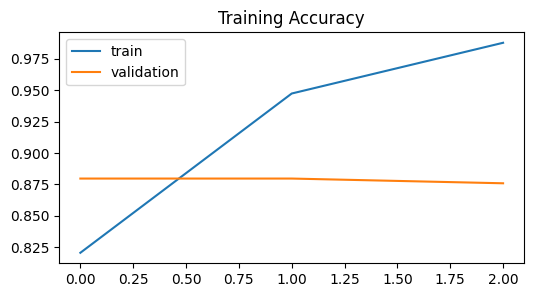

In [16]:
acc = histor.history['accuracy']
val_accuracy = histor.history['val_accuracy']
plt.figure(figsize=(6, 3))
plt.plot(acc, label='train')
plt.plot(val_accuracy, label='validation')
plt.title('Training Accuracy')
plt.legend()

Text(0.5, 1.0, 'Training Loss')

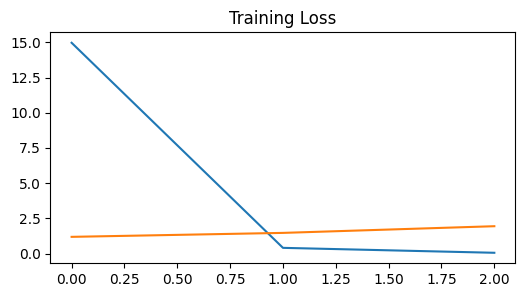

In [17]:
loss = histor.history['loss']
val_loss = histor.history['val_loss']
plt.figure(figsize=(6, 3))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss')